# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday,weekday_int,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,Thursday,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,460.0,0.0,504.0,81.0,82920.792079,Tuesday,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,Thursday,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.345393,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,Friday,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,Tuesday,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.845228,Tuesday,1,3,2017
23561,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,0.0,460.0,1.0,504.0,45.0,52542.372881,Monday,0,1,2018
23562,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,0.0,460.0,1.0,504.0,NaN,44091.710758,Sunday,6,2,2018
23563,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.610119,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.400651,Tuesday,1,3,2017


СКОЛЬКО ВСЕГО NaN ЗНАЧЕНИЙ ВО ВСЕХ 
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
price_per_sq_m             0
weekday                    0
weekday_int                0
month                      0
year                       0
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday,weekday_int,month,year,floor_obj
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,Thursday,3,3,2019,0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,460.0,0.0,504.0,81.0,82920.792079,Tuesday,1,12,2018,1
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,Thursday,3,8,2015,0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.345393,9,False,...,84.0,3.0,234.0,424.0,408176.100629,Friday,4,7,2015,0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,Tuesday,1,6,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,796.0,3.0,381.0,NaN,72490.845228,Tuesday,1,3,2017,0
23561,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,460.0,1.0,504.0,45.0,52542.372881,Monday,0,1,2018,0
23562,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,460.0,1.0,504.0,NaN,44091.710758,Sunday,6,2,2018,1
23563,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.610119,12,False,...,173.0,3.0,196.0,602.0,149511.400651,Tuesday,1,3,2017,0


СКОЛЬКО ВСЕГО NaN ЗНАЧЕНИЙ ВО ВСЕХ 
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
price_per_sq_m             0
weekday                    0
weekday_int                0
month                      0
year                       0
floor_obj                  0
dtype: int64
value_counts_count
2159
value_counts
45.00     419
42.00     383
60.00     346
31.00     346
44.00     343
         ... 
226.00      1
51.1

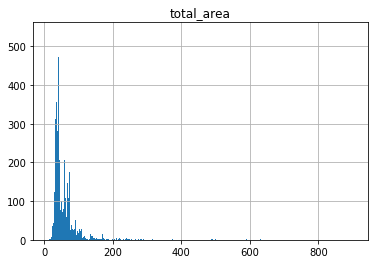

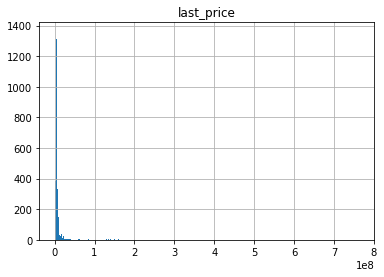

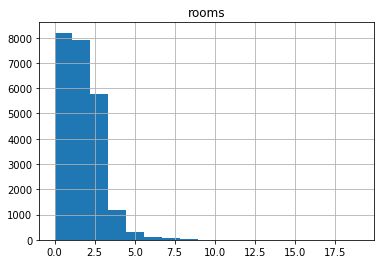

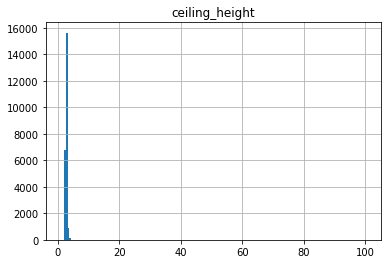

In [49]:
import pandas as pd
import datetime as dt
from IPython.display import display
import matplotlib.pyplot as plt

#________
#1 ПУНКТ
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #указать разделитель 

#________
#2 ПУНКТ
data.info()

#
#
#
'''
#FIRST_DAY_EXPOSITION (7+2= 9 ПУНКТ)
data['weekday'] = data['first_day_exposition'].dt.day_name() #создаем новый столбец с днями недели
data['month'] = data['first_day_exposition'].dt.month #создаем новый столбец со значением месяца
data['year'] = data['first_day_exposition'].dt.year #создаем новый столбец со значением месяца
'''
#
#
#
#display(data)
print('')
print('МЕДИАННОЕ ЗНАЧЕНИЕ "ceiling height"')
print(data['ceiling_height'].median()) #медианное значение в столбце 'ceiling height'
print('')

#__________
#3 ПУНКТ
print('СКОЛЬКО ВСЕГО NaN ЗНАЧЕНИЙ ВО ВСЕХ ')
print(data.isnull().sum()) #сколько всего NaN значений во всех столбцах
print('')
data.info() #инфо по всей выборке
print('')
print('МЕДИАНА ПО СТОЛБЦАМ, СОРТИРОВАННЫХ ПО "rooms" ЗНАЧЕНИЕ КОТОРЫХ = 1')
print(data[data['rooms'] == 1].median()) #медианное значение по всем столбцам, сортированных по столбцу 'rooms' значение которых = 1
print('')
print('СКОЛЬКО КВАРТИР С КОНКРЕТНЫМ ЧИСЛОМ КОМНАТ')
print(data['rooms'].value_counts()) #сколько квартир с конкретным числом комнат
#print(data['locality_name'].value_counts().count()) #сколько всего разных населённых пунктов
print('')
print('КОЛИЧЕСТВО НАСЕЛЁННЫХ ПУНКТОВ')
print(data['locality_name'].value_counts()) #количество населённых пунктов

#УДАЛЕНИЕ СТОЛБЦОВ 'floors_total' и 'locality_name'
#data = data.dropna(subset = [‘floors_total’, ’locality_name’], inplace = True)
#data.dropna(subset = ['floors_total', 'locality_name'], inplace = True).reset_index(drop = True)

#_________
#4 ПУНКТ: ЗАМЕНЫ!!!
print('ЗАМЕНА №1(ceiling_height)')
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #замена отсутствующих значений в столбце 'ceiling_height' на медианное значение
print('ПРОВЕРКА ПОСЛЕ ЗАМЕНЫ ceiling_height(1)')
print(data.isnull().sum())
data.info()

print('')

#ВНИЗУ ЗАМЕНА 2 и 7
print('ПРОВЕРКА ПЕРЕД УДАЛЕНИЕМ floors_total(2) и locality_name(7)')
print(data.isnull().sum()) #сколько всего NaN значений во всех столбцах
data.info()

print('УДАЛЕНИЕ floors_total(2) и locality_name(7)')
data.dropna(subset = ['floors_total', 'locality_name'], inplace = True)#.reset_index(drop = True)
data = data.reset_index(drop = True)

print('ПРОВЕРКА ПОСЛЕ УДАЛЕНИЯ floors_total(2) и locality_name(7)')
print(data.isnull().sum()) #сколько всего NaN значений во всех столбцах
data.info()

print('')

print('ЗАМЕНА №3(living_area)')
living_coeff_med = (data['living_area'] / data['total_area']).median() #медиана коэффициента жилой площади по всему датасету
data['living_area'] = data['living_area'].fillna(living_coeff_med * data['total_area']) #замениять NaN на среднюю площадь

#print('')
#print(data.isnull().sum())
#print('')
#print(data['floors_total'].count())

print('ЗАМЕНА №5(kitchen area)')
kitchen_coeff_med = (data['kitchen_area'] / data['total_area']).median() #медиана коэффициента площади кухни по всему датасету
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_coeff_med * data['total_area'])
print('ПРОВЕРКА ПОСЛЕ ЗАМЕНЫ living_area(5) и kitchen_area(3)')
print(data.isnull().sum())
data.info()

print('')

print('ЗАМЕНА №4(is_apartment)')
data['is_apartment'] = data['is_apartment'].fillna(False) #замена NaN значений на False(0)
print(data['is_apartment'].value_counts()) #проверка сколько False и True значений
print('ПРОВЕРКА ПОСЛЕ ЗАМЕНЫ is_apartment(4)')
print(data.isnull().sum())
data.info()

print('')

print('ЗАМЕНА №6(balcony)')
data['balcony'] = data['balcony'].fillna(0) #замена NaN значений на 0 в столбце 'balcony'
print('ПРОВЕРКА ПОСЛЕ ЗАМЕНЫ balcony(6)')
print(data.isnull().sum())
data.info()
print('')


#далее пойдёт предобработка данных по аэропортам, центру города, паркам и водоёмам

print(data['locality_name'].value_counts().index)
print(data['locality_name'].value_counts())
print(data[data['locality_name'] == 'Санкт-Петербург'].isnull().sum()) #проверяю сколько пропусков ДО цикла
print(data[data['locality_name'] == 'посёлок Мурино'].isnull().sum()) #проверяю сколько пропусков ДО цикла

abc = data['locality_name'].value_counts().index
for i in abc:
#    print(i)
    abc_1 = data[data['locality_name'] == i].median()
#    print(abc_1)
##    print(abc_1['airports_nearest'])
##    print(abc_1['cityCenters_nearest'])
##    print(abc_1['parks_around3000'])
##    print(abc_1['parks_nearest'])
##    print(abc_1['ponds_around3000'])
##    print(abc_1['ponds_nearest'])
    data['airports_nearest'] = data['airports_nearest'].fillna(abc_1['airports_nearest']) #ЗАМЕНА №8
    data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(abc_1['cityCenters_nearest']) #ЗАМЕНА №9
    data['parks_around3000'] = data['parks_around3000'].fillna(abc_1['parks_around3000']) #ЗАМЕНА №10
    data['parks_nearest'] = data['parks_nearest'].fillna(abc_1['parks_nearest']) #ЗАМЕНА №11
    data['ponds_around3000'] = data['ponds_around3000'].fillna(abc_1['ponds_around3000']) #ЗАМЕНА №12
    data['ponds_nearest'] = data['ponds_nearest'].fillna(abc_1['ponds_nearest']) #ЗАМЕНА №13
    
print(data.isnull().sum())
print(data[data['locality_name'] == 'Санкт-Петербург'].isnull().sum()) #проверяю сколько пропусков ПОСЛЕ цикла
print(data[data['locality_name'] == 'посёлок Мурино'].isnull().sum()) #проверяю сколько пропусков ПОСЛЕ цикла

#_________________
#ПУНКТ 5: ПОЯСНИТЬ КАКИЕ ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ОБНАРУЖЕНЫ


#_________________
#ПУНКТ 6: ИЗМЕНИТЬ ТИП ДАННЫХ
print('ЗАМЕНА ВРЕМЕНИ И ДАТЫ') #6 и 7 ПУНКТЫ в чекбоксе
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

#_________________
#ПУНКТ 7: ПОЯСНИТЬ ГДЕ И ПОЧЕМУ ИЗМЕНЁН ТИПА ДАННЫХ


#_________________
#ПУНКТ 8: ДОБАВИТЬ ЦЕНУ ЗА КВАДРАТНЫЙ МЕТР
data['price_per_sq_m'] = data['last_price']/data['total_area'] #новый столбец в таблице
print('ПРОВЕРКА НА NaN ЗНАЧЕНИЯ')
print(data.isnull().sum())
data.info()

#_________________
#ПУНКТ 9: ДОБАВИТЬ ДЕНЬ НЕДЕЛИ; МЕСЯЦ; ГОД ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ
data['weekday'] = data['first_day_exposition'].dt.day_name() #создаем новый столбец с днями недели
data['weekday_int'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month #создаем новый столбец со значением месяца
data['year'] = data['first_day_exposition'].dt.year #создаем новый столбец со значением месяца
print('ПРОВЕРКА ДНЕЙ НЕДЕЛИ, МЕСЯЦА И ГОДА ПУБЛИКАЦИИ')
display(data)

#_________________
#ПУНКТ 10: ДОБАВЛЕН ЭТАЖ КВАРТИРЫ(ПЕРВЫЙ, ПОСЛЕДНИЙ, ДРУГОЙ)
print('СКОЛЬКО ВСЕГО NaN ЗНАЧЕНИЙ ВО ВСЕХ ')
print(data.isnull().sum())

def purpose_change(row):
    if row['floor'] == 1:
        val = 1
    elif row['floor'] == row['floors_total']:
        val = 2
    else:
        val = 0
    return val
data['floor_obj'] = data.apply(purpose_change, axis = 1)
display(data)
print('СКОЛЬКО ВСЕГО NaN ЗНАЧЕНИЙ ВО ВСЕХ ')
print(data.isnull().sum()) #сколько всего NaN значений во всех столбцах

#СНАЧАЛА РЕАЛИЗОВАЛ ЦИКЛОМ( СНИЗУ ), НО ПОТОМ ПОНЯЛ, ЧТО ФУНКЦИЕЙ( СВЕРХУ ) БУДЕТ БЫСТРЕЕ

'''
#FLOORS
a = len(data['floor'])
for i in range(len(data['floor'])):
    if data.loc[i,'floor'] == 1:
        data.loc[i, 'floor_obj'] = 'первый'
    elif data.loc[i,'floor'] == data.loc[i, 'floors_total']:
        data.loc[i, 'floor_obj'] = 'последний'
    else:
        data.loc[i, 'floor_obj'] = 'другой'
display(data)
'''

#_________________
#ПУНКТ 11: ПОСЧИТАНО И ДОБАВЛЕНО ОТНОШЕНИЕ ЖИЛОЙ ПЛОЩАДИ К ОБЩЕЙ, И ПЛОЩАДИ КУХНИ К ОБЩЕЙ
data['living_area_coeff'] = data['living_area'] / data['total_area']
data['kitchen_area_coeff'] = data['kitchen_area'] / data['total_area']

#_________________
#ПУНКТ 12: ИЗУЧИТЬ ПАРАМЕТРЫ: ПЛОЩАДЬ, ЦЕНА, КОЛИЧЕСТВО КОМНАТ И ВЫСОТА ПОТОЛКОВ
    #[ДЛЯ ОПРЕДЕЛЕНИЯ bins И range
print('value_counts_count')
print(data['total_area'].value_counts().count())
print('value_counts')
print(data['total_area'].value_counts())
print('MIN')
print(data['total_area'].min())
print('MAX')
print(data['total_area'].max())

print('value_counts_count')
print(data['last_price'].value_counts().count())
print('value_counts')
print(data['last_price'].value_counts())
print('MIN')
print(data['last_price'].min())
print('MAX')
print(data['last_price'].max())

print('value_counts_count')
print(data['rooms'].value_counts().count())
print('value_counts')
print(data['rooms'].value_counts())
print('MIN')
print(data['rooms'].min())
print('MAX')
print(data['rooms'].max())

print('value_counts_count')
print(data['ceiling_height'].value_counts().count())
print('value_counts')
print(data['ceiling_height'].value_counts())
print('MIN')
print(data['ceiling_height'].min())
print('MAX')
print(data['ceiling_height'].max())
    #ДЛЯ ОПРЕДЕЛЕНИЯ bins И range]
data.hist(column = 'total_area', bins = 2159)
plt.show()

data.hist(column = 'last_price', bins = 2925)
plt.show()

data.hist(column = 'rooms', bins = 17)
plt.show()

data.hist(column = 'ceiling_height', bins = 183)
plt.show()


### Вывод

После первичного изучения данных были выявлены пропущенные значения в столбцах: <b> ceiling_height(9195) </b> высота потолков (м), <b> floors_total(86) </b> всего этажей в доме, <b> living_area(1903) </b> жилая площадь в квадратных метрах(м²), <b> is_apartment(20924) </b> апартаменты (булев тип), <b> kitchen_area(2278) </b> площадь кухни в квадратных метрах (м²), <b> balcony(11519) </b> число балконов, <b> locality_name(49) </b> название населённого пункта, <b> airports_nearest(5542) </b> расстояние до ближайшего аэропорта в метрах (м), <b> cityCenters_nearest(5519) </b> расстояние до центра города (м), <b> parks_around3000(5518) </b> число парков в радиусе 3 км, <b> parks_nearest(15620) </b> расстояние до ближайшего парка (м), <b> ponds_around3000(5518) </b> число водоёмов в радиусе 3 км, <b> ponds_nearest(14589) </b> расстояние до ближайшего водоёма (м), <b> days_exposition(3181) </b> сколько дней было размещено объявление (от публикации до снятия).

Разберу каждый столбец, который имеет пропущенные значения:

-ceiling_height(9195); высота потолков (м): ВЫСОТА ПОТОЛКА НЕ МОЖЕТ БЫТЬ 0

-floors_total(86); всего этажей в доме: ЭТАЖЕЙ В ЗДАНИИ НЕ МОЖЕТ БЫТЬ 0

-living_area(1903); жилая площадь в квадратных метрах(м²): ПЛОЩАДЬ НЕ МОЖЕТ БЫТЬ 0м²

-is_apartment(20924); апартаменты (булев тип): ЕСЛИ ЗАМЕНИТЬ НА 0, ТО ДАННЫЕ БУДУТ НЕКОРРЕКТНЫМИ, ТАК КАК ИСТИННОЕ ЗНАЧЕНИЕ МОГЛО БЫТЬ 1, А МЫ ВПИШЕМ 0

-kitchen_area(2278); площадь кухни в квадратных метрах (м²): ПЛОЩАДЬ КУХНИ НЕ МОЖЕТ БЫТЬ 0м²

-balcony(11519); число балконов: ЕСЛИ ЗАМЕНИТЬ НА 0, ТО ДАННЫЕ БУДУТ НЕКОРРЕКТНЫМИ, ТАК КАК ИСТИННОЕ ЗНАЧЕНИЕ ЧИСЛА БАЛКОНОВ МОГЛО БЫТЬ ОТЛИЧНЫМ ОТ 0

-locality_name(49); название населённого пункта: 

-airports_nearest(5542); расстояние до ближайшего аэропорта в метрах (м): РАССТОЯНИЕ ДО АЭРОПОРТА НЕ МОЖЕТ = 0

-cityCenters_nearest(5519); расстояние до центра города (м):

-parks_around3000(5518); число парков в радиусе 3 км:

-parks_nearest(15620); расстояние до ближайшего парка (м): РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА МОЖЕТ = 0, ТАК КАК НЕБОЛЬШОЙ ПАРК МОЖЕТ НАХОДИТЬСЯ ПРЯМО ВО ДВОРЕ ЖК

-ponds_around3000(5518); число водоёмов в радиусе 3 км:

-ponds_nearest(14589); расстояние до ближайшего водоёма (м): РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ВОДОЁМА МОЖЕТ = 0, ТАК КАК НЕБОЛЬШОЙ ВОДОЁМ МОЖЕТ НАХОДИТЬСЯ ПРЯМО ВО ДВОРЕ ЖК

-days_exposition(3181); сколько дней было размещено объявление (от публикации до снятия): 

Из всего написанного можно сделать вывод, что 

<div class="alert alert-info"> <b>Задания: </b> заполнены пропущенные значения. Есть пояснение, какие пропущенные значения обнаружены </div>

<div class="alert alert-info"> <b>ВОПРОС ДЛЯ СЕБЯ:</b> тип данных у времени? </div>

<div class="alert alert-info"> <b>РЕШЕНИЕ 1:</b> у переменной balcony должен быть тип int. </div>

<div class="alert alert-info"> <b>РЕШЕНИЕ 2:</b> у переменной parks_around3000 должен быть тип int. </div>

<div class="alert alert-info"> <b>РЕШЕНИЕ 3:</b> у переменной ponds_around3000 должен быть тип int. </div>

<div class="alert alert-info"> <b>РЕШЕНИЕ 4:</b> у переменной days_exposition должен быть тип int. </div>

Данные из столбцов <b>airports_nearest(5542), cityCenters_nearest(5519), parks_around3000(5518), ponds_nearest(14589). </b> получить следующим образом: усреднить значения(медианное значение) по имеющимся данным в зависимости от населённого пункта.
__________

<b>ПУНКТ 5</b>

После первичного изучения данных были выявлены пропущенные значения в столбцах: <b> ceiling_height(9195) </b> высота потолков (м), <b> floors_total(86) </b> всего этажей в доме, <b> living_area(1903) </b> жилая площадь в квадратных метрах(м²), <b> is_apartment(20924) </b> апартаменты (булев тип), <b> kitchen_area(2278) </b> площадь кухни в квадратных метрах (м²), <b> balcony(11519) </b> число балконов, <b> locality_name(49) </b> название населённого пункта, <b> airports_nearest(5542) </b> расстояние до ближайшего аэропорта в метрах (м), <b> cityCenters_nearest(5519) </b> расстояние до центра города (м), <b> parks_around3000(5518) </b> число парков в радиусе 3 км, <b> parks_nearest(15620) </b> расстояние до ближайшего парка (м), <b> ponds_around3000(5518) </b> число водоёмов в радиусе 3 км, <b> ponds_nearest(14589) </b> расстояние до ближайшего водоёма (м), <b> days_exposition(3181) </b> сколько дней было размещено объявление (от публикации до снятия).

<b>ПУНКТ 7:</b>

<b>ceiling_height</b> было выбрано медианное значение вместо NaN значений, так как в среднем высота потолков равна.

<b>floors_total</b> значений было слишком мало 86/23699, что примерно равно 0,4%, поэтому просто удалил NaN значения

<b>living_area</b> выбрал вариант заменить NaN значения с помощью коэффициента жилой площади

<b>kitchen_area</b> выбрал вариант заменить NaN значения с помощью коэффициента площади кухни

<b>balcony</b> предположил, что не был заполнен чекбокс, поэтому NaN значения заменал на 0

<b>locality_name</b> значений было слишком мало 49/23699, что примерно равно 0,2%, поэтому просто удалил NaN значения

<b>airports</b> заменил на медианное значение относительно насалённого пункта

<b>CityCenters</b> заменил на медианное значение относительно насалённого пункта

<b>parks3000</b> заменил на медианное значение относительно насалённого пункта

<b>parks_nearest</b> заменил на медианное значение относительно насалённого пункта

<b>ponds3000</b> заменил на медианное значение относительно насалённого пункта

<b>ponds_nearest</b> заменил на медианное значение относительно насалённого пункта

<b>days_exposition</b> решил оставить значения, так как была выдвинута гепотиза о том, что объявления ещё активны


<b>Вывод от 3 ноября 2020 года</b>: мною было принято решение оставить NaN в столбце <b>'days_exposition'</b>, так как описание было дополнено очень важным уточнением: (от публикации ДО снятия). В связи с этим можно предположить, что квартиру ещё не сняли(не купили). 

Так же NaN значения параметра <b>is_apartment</b> были заменены на False(0). После чего не пришлось менять тип целого столбца.

Был изменен столбец <b>first_day_exposition</b>, формат столбца так же изменился на <b>datetime64</b>.

Так же были созданы новые столбцы с <b>днём недели, месяцем, годом, и этажами</b> определённой квартиры, размещённой в объявлении.





Мною было принято решение оставить NaN значения в ячейках о дальности местонахождения аэропортов, парков, прудов, там где по всей местности значения были пустыми, лучшего варианта не нашёл, т.к. придумывать смысла нет, получится просто рандом, а выставлять везде нули будет ещё хуже.



### Шаг 2. Предобработка данных


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
price_per_sq_m             0
weekday                    0
weekday_int                0
month                      0
year                       0
floor_obj                  0
living_area_coeff          0
kitchen_area_coeff         0
dtype: int64
45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
1355.0      1
873.0       1
730.0

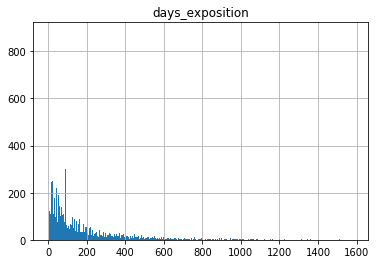

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 30 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        23565 non-null float64
cityCenters_nearest     23565 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           23565 non-null float64
ponds_a

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_sq_m,weekday,weekday_int,month,year,floor_obj,living_area_coeff,kitchen_area_coeff
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,755.0,NaN,120370.370370,Thursday,3,3,2019,0,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,504.0,81.0,82920.792079,Tuesday,1,12,2018,1,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,574.0,558.0,92785.714286,Thursday,3,8,2015,0,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.345393,9,False,...,234.0,424.0,408176.100629,Friday,4,7,2015,0,0.568210,0.172363
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,48.0,121.0,100000.000000,Tuesday,1,6,2018,0,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,381.0,NaN,72490.845228,Tuesday,1,3,2017,0,0.547792,0.103356
23561,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,504.0,45.0,52542.372881,Monday,0,1,2018,0,0.644068,0.144068
23562,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,504.0,NaN,44091.710758,Sunday,6,2,2018,1,0.523810,0.172363
23563,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.610119,12,False,...,196.0,602.0,149511.400651,Tuesday,1,3,2017,0,0.568210,0.303583


0    17326
2     3330
1     2909
Name: floor_obj, dtype: int64
       total_images  last_price  total_area first_day_exposition  rooms  \
1                 7   3350000.0        40.4           2018-12-04      1   
12               10   3890000.0        54.0           2016-06-30      2   
13               20   3550000.0        42.8           2017-07-01      2   
14                1   4400000.0        36.0           2016-06-23      1   
16               11   6700000.0        82.0           2017-11-23      3   
...             ...         ...         ...                  ...    ...   
23539             9   3100000.0        23.0           2018-03-19      1   
23546            14   5000000.0        59.0           2019-04-04      3   
23551            15   2490000.0        31.0           2019-01-24      1   
23562            18   2500000.0        56.7           2018-02-11      2   
23564             4   1350000.0        32.3           2017-07-21      1   

       ceiling_height  floors_total 

Санкт-Петербург                          15651
посёлок Мурино                             520
посёлок Шушары                             439
Всеволожск                                 398
Пушкин                                     369
                                         ...  
коттеджный посёлок Лесное                    1
поселок Кирпичное                            1
деревня Тойворово                            1
посёлок Белоостров                           1
поселок городского типа Большая Ижора        1
Name: locality_name, Length: 364, dtype: int64

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')
       locality_name
0    Санкт-Петербург
1     посёлок Мурино
2     посёлок Шушары
3         Всеволожск
4             Пушкин
5            Колпино
6  посёлок Парголово
7            Гатчина
8    деревня Кудрово
9             Выборг
Пример для Питера


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_sq_m,weekday,weekday_int,month,year,floor_obj,living_area_coeff,kitchen_area_coeff
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,755.0,NaN,120370.370370,Thursday,3,3,2019,0,0.472222,0.231481
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,574.0,558.0,92785.714286,Thursday,3,8,2015,0,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.345393,9,False,...,234.0,424.0,408176.100629,Friday,4,7,2015,0,0.568210,0.172363
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,48.0,121.0,100000.000000,Tuesday,1,6,2018,0,0.320000,0.410000
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.683837,22,False,...,504.0,NaN,110544.692737,Thursday,3,4,2019,0,0.568210,0.263966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23555,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,652.0,29.0,100566.572238,Wednesday,2,2,2018,0,0.461756,0.257790
23556,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.000000,2,False,...,504.0,15.0,105769.230769,Thursday,3,7,2018,0,0.596154,0.115385
23557,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,806.0,519.0,129903.978052,Thursday,3,10,2016,0,0.552812,0.145405
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,381.0,NaN,72490.845228,Tuesday,1,3,2017,0,0.547792,0.103356


114868.87734123554
114868.87734123554
Пример для Мурино


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_sq_m,weekday,weekday_int,month,year,floor_obj,living_area_coeff,kitchen_area_coeff
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,504.0,189.0,87454.764777,Wednesday,2,5,2018,0,0.465320,0.265682
38,10,3150000.0,40.00,2018-03-29,1,2.75,18.0,16.300000,9,False,...,504.0,103.0,78750.000000,Thursday,3,3,2018,0,0.407500,0.290000
60,3,2740000.0,35.00,2018-01-01,1,2.65,12.0,19.887351,8,False,...,504.0,11.0,78285.714286,Monday,0,1,2018,0,0.568210,0.172363
133,12,3150000.0,31.00,2018-03-23,1,2.65,25.0,17.614510,6,False,...,504.0,78.0,101612.903226,Friday,4,3,2018,0,0.568210,0.172363
144,1,2450000.0,27.00,2017-03-30,0,2.65,24.0,15.500000,2,False,...,504.0,181.0,90740.740741,Thursday,3,3,2017,0,0.574074,0.172363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,0,2500000.0,27.70,2017-09-28,0,2.65,24.0,18.000000,4,False,...,504.0,4.0,90252.707581,Thursday,3,9,2017,0,0.649819,0.172363
23329,11,3195000.0,37.00,2017-06-14,1,2.65,27.0,18.000000,16,False,...,504.0,66.0,86351.351351,Wednesday,2,6,2017,0,0.486486,0.270270
23340,10,3750000.0,41.50,2018-10-15,1,2.80,22.0,15.600000,13,False,...,504.0,74.0,90361.445783,Monday,0,10,2018,0,0.375904,0.269880
23407,10,3600000.0,35.60,2017-07-12,1,2.75,25.0,17.000000,7,False,...,504.0,35.0,101123.595506,Wednesday,2,7,2017,0,0.477528,0.337079


85673.25992832569
       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23555            13   3550000.0       35.30           2018-02-28      1   
23556             3   5500000.0       52.00           2018-07-19      2   
23557            11   9470000.0       72.90           2016-10-13      2   
23560             9   9700000.0      133.81           2017-03-21      3   
23563            13  11475000.0       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0  

,locality_name,mean_price_per_sq_m
0,Санкт-Петербург,114868.877341
1,посёлок Мурино,85673.259928
2,посёлок Шушары,78551.344545
3,Всеволожск,68654.473986
4,Пушкин,103125.819291
5,Колпино,75424.579098
6,посёлок Парголово,90175.913458
7,Гатчина,68746.146763
8,деревня Кудрово,92473.547576
9,Выборг,58141.909153


763000000.0
12897    Санкт-Петербург
Name: locality_name, dtype: object
8750    Санкт-Петербург
Name: locality_name, dtype: object


In [95]:
import matplotlib.pyplot as plt
from IPython.display import display
'''
ЗАДАНИЕ 1
Изучите время продажи квартиры('days_exposition'). 
Постройте гистограмму. 
Посчитайте среднее и медиану.
Опишите, сколько обычно занимает продажа. 
Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
'''
#data.info()
print(data.isnull().sum())
print(data['days_exposition'].value_counts())
print('КОЛИЧЕСТВО ЗНАЧЕНИЙ 1(TRUE)')
print(data['days_exposition'].value_counts() == 1)
print((data['days_exposition'].value_counts() == 1).value_counts())
print('MIN')
print(data['days_exposition'].min())
print('MAX')
print(data['days_exposition'].max())
print('МЕДИАНА')
print(data['days_exposition'].median())
print('СРЕДНЕЕ')
print(data['days_exposition'].mean())


data.hist(column = 'days_exposition', bins = 1139, range = (0, 1580))
plt.show()
data.info()
'''
ЗАДАНИЕ 2:
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

РЕШЕНИЕ
Смотря на гистограмму выше можно сказать следующее:
-ceiling_height: квартиры с высотой потолков больше 3 метров редки(1525), после 3.5 - 302, после 4 - 75. 
    Было принято решение отбросить значения больше 4.
-rooms: квартиры с числом комнат >8 - 19, >7 - 31, >6 - 90, >5 - 194.
    Было принято решение отбросить значения больше 8.
-last_price: 
    Было принято решение отбросить значения больше '15 000 000'.
-total_area: 
    Было принято решение отбросить значения больше 125.
print(data['days_exposition'].value_counts().sort_values(ascending=False).head(400))

Особенности:
    Есть теория о том, что есть апартаменты с гигантской площадью, очень высокими потолками, большой квадратурой, ну и как следствие большой ценой.
'''

#РЕШЕНИЕ ЕСТЬ, НУЖНО ПРОСТО ДОПОЛНИТЬ

'''
ЗАДАНИЕ 3
Какие факторы больше всего влияют на стоимость квартиры? 
Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 
corr(price, area) 
corr(price, rooms)
corr(price, floor)
corr(price, cityCenter)
Также изучите зависимость от даты размещения: дня недели, месяца и года.
corr(price, day) (???)
corr(price, monunt)
corr(price, year)

"Выберите 10 населённых пунктов с наибольшим числом объявлений. 

Посчитайте среднюю цену квадратного метра в этих населённых пунктах. mean(price/area)

Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. 
'''

display(data)
print(data['floor_obj'].value_counts())
print(data.query('floor_obj == 1 or floor_obj == 2'))


ddata = data.query('floor_obj == 1 or floor_obj == 2') #обрезанная data(без 0(ДРУГОЙ ЭТАЖ))
ddata = ddata.reset_index(drop = True)
ddata.info()

print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ПЛОЩАДЬЮ')
print(data['last_price'].corr(data['total_area']))
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЧИСЛОМ КОМНАТ')
print(data['last_price'].corr(data['rooms']))
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЭТАЖА(ПЕРВОГО(1) И ПОСЛЕДНЕГО(2))')
print(ddata['last_price'].corr(ddata['floor_obj']))
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И УДАЛЁННОСТИ ОТ ЦЕНТРА')
print(data['last_price'].corr(data['cityCenters_nearest']))


print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ДНЁМ НЕДЕЛИ ПУБЛИКАЦИИ')
print(data['last_price'].corr(data['weekday_int']))
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И МЕСЯЦЕМ ПУБЛИКАЦИИ')
print(data['last_price'].corr(data['month']))
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ГОДОМ ПУБЛИКАЦИИ')
print(data['last_price'].corr(data['year']))

#pivot_table
#НИЖЕ ВЫДЕЛИЛ НАЗВАНИЯ 10 ГОРОДОВ С МАКСИМАЛЬНО БОЛЬШИМ КОЛИЧЕСТВОМ ОБЪЯВЛЕНИЙ
data_1 = data['locality_name'].value_counts(ascending = False)
display(data_1)
display(data_1.index[0:10])
local_name_10 = data_1.index[0:10]
print(local_name_10)
df = pd.DataFrame({'locality_name':local_name_10})
print(df)


#data['price_per_sq_m'] = data['last_price']/data['total_area'] #новый столбец в таблице
#data[data['']]

'''
ПРИМЕР
def purpose_change(row):
    if row['floor'] == 1:
        val = 1
    elif row['floor'] == row['floors_total']:
        val = 2
    else:
        val = 0
    return val
data['floor_obj'] = data.apply(purpose_change, axis = 1)
'''
print('Пример для Питера')
display(data[data['locality_name'] == 'Санкт-Петербург'])
print(data[data['locality_name'] == 'Санкт-Петербург'].loc[:, 'price_per_sq_m'].mean())
print(data[data['locality_name'] == 'Санкт-Петербург']['price_per_sq_m'].mean())
print('Пример для Мурино')
display(data[data['locality_name'] == 'посёлок Мурино'])
print(data[data['locality_name'] == 'посёлок Мурино'].loc[:, 'price_per_sq_m'].mean())


print(data[data['locality_name'].isin(df['locality_name'])])
data_10_locality_name = data[data['locality_name'].isin(df['locality_name'])] #вычленил 10 населённых пунктов из таблицы с наибольшим числом объявлений


df.loc[0, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[0, 'locality_name']]['price_per_sq_m'].mean()
df.loc[1, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[1, 'locality_name']]['price_per_sq_m'].mean()
df.loc[2, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[2, 'locality_name']]['price_per_sq_m'].mean()
df.loc[3, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[3, 'locality_name']]['price_per_sq_m'].mean()
df.loc[4, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[4, 'locality_name']]['price_per_sq_m'].mean()
df.loc[5, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[5, 'locality_name']]['price_per_sq_m'].mean()
df.loc[6, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[6, 'locality_name']]['price_per_sq_m'].mean()
df.loc[7, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[7, 'locality_name']]['price_per_sq_m'].mean()
df.loc[8, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[8, 'locality_name']]['price_per_sq_m'].mean()
df.loc[9, 'mean_price_per_sq_m'] = data_10_locality_name[data_10_locality_name['locality_name'] == df.loc[9, 'locality_name']]['price_per_sq_m'].mean()
display(df)


'''
ПОПЫТКИ РЕШИТЬ 3
print(df.loc[1, 'locality_name'])
#print(data_10_locality_name[data['locality_name'] == df[]])
 

def per_sq_m(row):
    if row[row['locality_name'] == df[df['locality_name']]]:
        return (row['price_per_sq_m'].mean())
    
df['mean_price_per_sq_m'] = data_10_locality_name.apply(per_sq_m)
display(df)
'''


'''
ПОПЫТКИ РЕШИТЬ 2
def per_sq_m(row):
#    if df['locality_name'] == row['locality_name']:
    row[row['locality_name']]['price_per_sq_m'].mean()
    #return row['price_per_sq_m'].mean()
df['mean_price_per_sq_m'] = data_10_locality_name.apply(per_sq_m)
display(df)


#if data['locality_name'] == df['locality_name']:
#    data[data['locality_name'] == df['locality_name']].loc[:, 'price_per_sq_m'].mean()

#print(data[data['last_price'].max()])
'''



'''
ПОПЫТКИ РЕШИТЬ
def per_sq_m(row):
    if row['locality_name'] == df['locality_name']:
#        return row[row['locality_name'] == df['locality_name']].loc[:, 'price_per_sq_m'].mean()
        return row['price_per_sq_m'].mean()

#df['mean_price_per_sq_m'] = data.apply(per_sq_m, axis = 1)
df['mean_price_per_sq_m'] = data.apply(per_sq_m)
display(df)
'''

#МОЖНО БЫЛО СЛЕДАТЬ ФУНКЦИЕЙ, НО У МЕНЯ ЭТО НЕ ПОЛУЧИЛОСЬ...


print(data_10_locality_name['last_price'].max())
MAX = data_10_locality_name[data_10_locality_name['last_price'] == data_10_locality_name['last_price'].max()]
print(MAX['locality_name'])
MIN = data_10_locality_name[data_10_locality_name['last_price'] == data_10_locality_name['last_price'].min()]
print(MIN['locality_name'])


Мною было принято решение оставить NaN значения в ячейках о дальности местонахождения аэропортов, парков, прудов, там где по всей местности значения были пустыми, лучшего варианта не нашёл, т.к. придумывать смысла нет, получится просто рандом, а выставлять везде нули будет ещё хуже.

<b>ЗАДАЧА 1:</b> Можно сделать вывод о том, что до среднего значения квартиры можно считать быстро проданными, а после долго продаваемыми.

Так же хочу добавить, что я , взглянув на гистограмму, считал бы квартиру необычно долго продаваемой, если бы объявление о продажи было активно более 500 дней. А очень быстро проданной, если бы объявление находилось меньше медианного значения.

Можно так же сказать, что от начала до Q1 - необычно быстро, а от Q3 до конца - необычно долго.

<b>ЗАДАЧА 2:</b> Смотря на гистограмму выше можно сказать следующее:

-ceiling_height: квартиры с высотой потолков больше 3 метров редки(1525), после 3.5 - 302, после 4 - 75. 
    Было принято решение отбросить значения больше 4.
    
-rooms: квартиры с числом комнат >8 - 19, >7 - 31, >6 - 90, >5 - 194.
    Было принято решение отбросить значения больше 8.

-last_price: 
    Было принято решение отбросить значения больше '15 000 000'.

-total_area: 
    Было принято решение отбросить значения больше 125.

print(data['days_exposition'].value_counts().sort_values(ascending=False).head(400))

Особенности:

Есть теория о том, что есть апартаменты с гигантской площадью, очень высокими потолками, большой квадратурой, ну и как следствие большой ценой.

<b>ЗАДАЧА 3:</b> ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ПЛОЩАДЬЮ: 0.6536213939252806

ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЧИСЛОМ КОМНАТ: 0.3631905485065748

ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЭТАЖА(ПЕРВОГО(1) И ПОСЛЕДНЕГО(2)): 0.08188308451584925

ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И УДАЛЁННОСТИ ОТ ЦЕНТРА: -0.1816377061195787

ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ДНЁМ НЕДЕЛИ ПУБЛИКАЦИИ: 0.0013569211122710775

ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И МЕСЯЦЕМ ПУБЛИКАЦИИ: 0.0027259571647347603

ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ГОДОМ ПУБЛИКАЦИИ: -0.042864152713611034

Можно сделать вывод о том, что большую значимость на цену жилья оказывает площадь квартиры, а лишь после число комнат в квартире. Остальные факторы, по результатам анализа, оказались крайне незначительными

Населённым пунктом, имеющим максимальную и минимальную цену, оказался Санкт-Петербург.


### Шаг 3. Посчитайте и добавьте в таблицу

Изучить параметры: ПЛОЩАДЬ(total_area), ЦЕНА(last_price), ЧИСЛО КОМНАТ(rooms), ВЫСОТА ПОТОЛКОВ(ceiling_height)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_sq_m,weekday,weekday_int,month,year,floor_obj,living_area_coeff,kitchen_area_coeff,cityCenter_km,$_for_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,120370.370370,Thursday,3,3,2019,0,0.472222,0.231481,16.028,8.110806e+05
1,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,92785.714286,Thursday,3,8,2015,0,0.612500,0.148214,13.933,3.729276e+05
2,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.345393,9,False,...,408176.100629,Friday,4,7,2015,0,0.568210,0.172363,6.800,9.544118e+06
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,100000.000000,Tuesday,1,6,2018,0,0.320000,0.410000,8.098,1.234873e+06
4,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.683837,22,False,...,110544.692737,Thursday,3,4,2019,0,0.568210,0.263966,11.634,6.803335e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,100566.572238,Wednesday,2,2,2018,0,0.461756,0.257790,16.081,2.207574e+05
15647,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.000000,2,False,...,105769.230769,Thursday,3,7,2018,0,0.596154,0.115385,6.263,8.781734e+05
15648,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,129903.978052,Thursday,3,10,2016,0,0.552812,0.145405,4.489,2.109601e+06
15649,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,72490.845228,Tuesday,1,3,2017,0,0.547792,0.103356,4.232,2.292060e+06


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_sq_m,weekday,weekday_int,month,year,floor_obj,living_area_coeff,kitchen_area_coeff,cityCenter_km,$_for_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,120370.370370,Thursday,3,3,2019,0,0.472222,0.231481,16.028,8.110806e+05
1,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,92785.714286,Thursday,3,8,2015,0,0.612500,0.148214,13.933,3.729276e+05
2,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.345393,9,False,...,408176.100629,Friday,4,7,2015,0,0.568210,0.172363,6.800,9.544118e+06
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,100000.000000,Tuesday,1,6,2018,0,0.320000,0.410000,8.098,1.234873e+06
4,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.683837,22,False,...,110544.692737,Thursday,3,4,2019,0,0.568210,0.263966,11.634,6.803335e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,100566.572238,Wednesday,2,2,2018,0,0.461756,0.257790,16.081,2.207574e+05
15647,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.000000,2,False,...,105769.230769,Thursday,3,7,2018,0,0.596154,0.115385,6.263,8.781734e+05
15648,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,129903.978052,Thursday,3,10,2016,0,0.552812,0.145405,4.489,2.109601e+06
15649,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,72490.845228,Tuesday,1,3,2017,0,0.547792,0.103356,4.232,2.292060e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15651 entries, 0 to 15650
Data columns (total 32 columns):
total_images            15651 non-null int64
last_price              15651 non-null float64
total_area              15651 non-null float64
first_day_exposition    15651 non-null datetime64[ns]
rooms                   15651 non-null int64
ceiling_height          15651 non-null float64
floors_total            15651 non-null float64
living_area             15651 non-null float64
floor                   15651 non-null int64
is_apartment            15651 non-null bool
studio                  15651 non-null bool
open_plan               15651 non-null bool
kitchen_area            15651 non-null float64
balcony                 15651 non-null float64
locality_name           15651 non-null object
airports_nearest        15651 non-null float64
cityCenters_nearest     15651 non-null float64
parks_around3000        15651 non-null float64
parks_nearest           15651 non-null float64
ponds_a

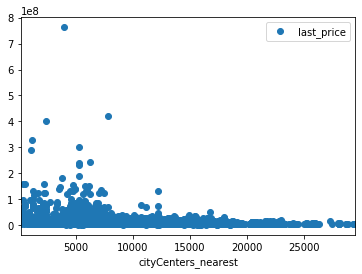

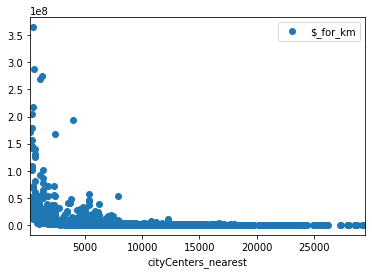

In [107]:
import matplotlib.pyplot as plt
from IPython.display import display
'''
ЗАДАНИЕ 4
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. 
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. /1000(cityCenter_km)
После этого посчитайте среднюю цену для каждого километра. mean/км(total_price/cityCenter_km)


Постройте график: он должен показывать, как цена зависит от удалённости от центра. plot
Определите границу, где график сильно меняется — это и будет центральная зона.
'''

data = data[data['locality_name'] == 'Санкт-Петербург']
#display(data)
data = data.reset_index(drop = True)
display(data)

data['cityCenter_km'] = data['cityCenters_nearest']/1000
data['$_for_km'] = data['last_price']/data['cityCenter_km']
display(data)
data.info()
#data.plot(y = 'last_price', x = 'cityCenters_nearest', style = 'o')
data.plot(y = '$_for_km', x = 'cityCenters_nearest', style = 'o')

#cityCenter_nearest
#data['locality_name'] == 'Санкт-Петербург'


ВОПРОС: как выводить не на одной гистрограмме?(РЕШЕНО: plt.show())


ОЧЕНЬ ВАЖНЫЙ ВОПРОС: данные по продаже квартир ЛИБО ЖЕ как по продаже, так и по сдаче? (на продажу)

<b>ЗАДАЧА 4:</b> по графику можем определить то, что границей является 7км. Т.е. центральная зона - максимум 7 километров от ЦЕНТРА города. 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_sq_m,weekday,weekday_int,month,year,floor_obj,living_area_coeff,kitchen_area_coeff,cityCenter_km,$_for_km
0,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.345393,9,False,...,408176.100629,Friday,4,7,2015,0,0.568210,0.172363,6.800,9.544118e+06
1,8,6500000.0,97.20,2015-10-31,2,2.65,3.0,46.500000,1,False,...,66872.427984,Saturday,5,10,2015,1,0.478395,0.201646,2.336,2.782534e+06
2,6,15500000.0,149.00,2017-06-26,5,2.65,5.0,104.000000,4,False,...,104026.845638,Monday,0,6,2017,0,0.697987,0.114094,3.502,4.426042e+06
3,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.000000,4,False,...,279503.105590,Tuesday,1,10,2017,0,0.236025,0.310559,6.589,6.829564e+06
4,20,11795000.0,136.00,2017-09-22,6,3.00,2.0,94.000000,2,False,...,86727.941176,Friday,4,9,2017,2,0.691176,0.080882,6.582,1.792009e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,5,9000000.0,110.00,2015-12-10,4,3.36,7.0,64.600000,5,False,...,81818.181818,Thursday,3,12,2015,0,0.587273,0.143636,5.016,1.794258e+06
3294,11,4250000.0,47.00,2016-05-20,1,2.65,6.0,18.200000,1,False,...,90425.531915,Friday,4,5,2016,1,0.387234,0.310638,4.946,8.592802e+05
3295,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.000000,2,False,...,105769.230769,Thursday,3,7,2018,0,0.596154,0.115385,6.263,8.781734e+05
3296,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,129903.978052,Thursday,3,10,2016,0,0.552812,0.145405,4.489,2.109601e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Data columns (total 32 columns):
total_images            3298 non-null int64
last_price              3298 non-null float64
total_area              3298 non-null float64
first_day_exposition    3298 non-null datetime64[ns]
rooms                   3298 non-null int64
ceiling_height          3298 non-null float64
floors_total            3298 non-null float64
living_area             3298 non-null float64
floor                   3298 non-null int64
is_apartment            3298 non-null bool
studio                  3298 non-null bool
open_plan               3298 non-null bool
kitchen_area            3298 non-null float64
balcony                 3298 non-null float64
locality_name           3298 non-null object
airports_nearest        3298 non-null float64
cityCenters_nearest     3298 non-null float64
parks_around3000        3298 non-null float64
parks_nearest           3298 non-null float64
ponds_around3000        3298

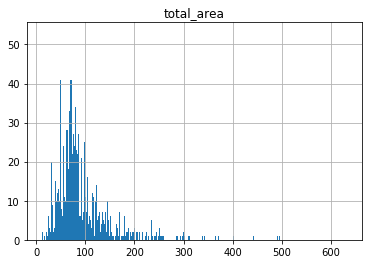



value_counts_count
1077
value_counts
8500000.0     48
7500000.0     46
8000000.0     40
6500000.0     40
9500000.0     35
              ..
5590000.0      1
9476000.0      1
9607000.0      1
8755014.0      1
12288000.0     1
Name: last_price, Length: 1077, dtype: int64
9300000.0
1600000.0
763000000.0


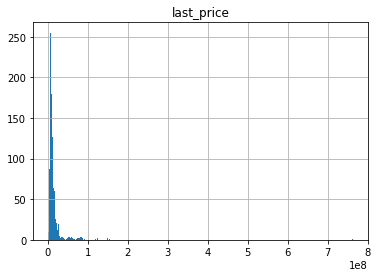



value_counts_count
16
value_counts
3     1011
2      962
1      476
4      465
5      213
6       81
7       54
0       15
8       10
9        3
11       2
10       2
19       1
15       1
16       1
14       1
Name: rooms, dtype: int64
3.0
0
19


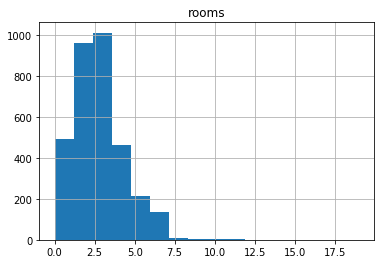



value_counts_count
150
value_counts
2.65    1158
3.00     426
3.20     174
2.70     114
2.80     109
        ... 
3.48       1
4.30       1
3.39       1
3.24       1
3.62       1
Name: ceiling_height, Length: 150, dtype: int64
2.8449999999999998
2.4
32.0


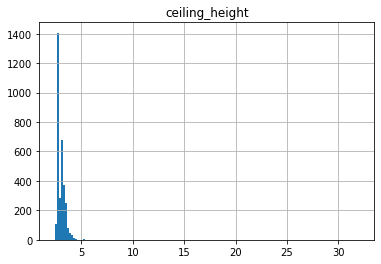

ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ПЛОЩАДЬЮ
0.6076941437802088
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЧИСЛОМ КОМНАТ
0.3098051903622244
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239 entries, 0 to 6238
Data columns (total 30 columns):
total_images            6239 non-null int64
last_price              6239 non-null float64
total_area              6239 non-null float64
first_day_exposition    6239 non-null datetime64[ns]
rooms                   6239 non-null int64
ceiling_height          6239 non-null float64
floors_total            6239 non-null float64
living_area             6239 non-null float64
floor                   6239 non-null int64
is_apartment            6239 non-null bool
studio                  6239 non-null bool
open_plan               6239 non-null bool
kitchen_area            6239 non-null float64
balcony                 6239 non-null float64
locality_name           6239 non-null object
airports_nearest        6239 non-null float64
cityCenters_nearest     6239 non-null float64
parks_a

'\nСтарая статистика:\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ПЛОЩАДЬЮ\n0.6536213939252806\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЧИСЛОМ КОМНАТ\n0.3631905485065748\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЭТАЖА(ПЕРВОГО(1) И ПОСЛЕДНЕГО(2))\n0.08188308451584925\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И УДАЛЁННОСТИ ОТ ЦЕНТРА\n-0.1816377061195787\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ДНЁМ НЕДЕЛИ ПУБЛИКАЦИИ\n0.0013569211122710775\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И МЕСЯЦЕМ ПУБЛИКАЦИИ\n0.0027259571647347603\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ГОДОМ ПУБЛИКАЦИИ\n-0.042864152713611034\n\nНовая статистика\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ПЛОЩАДЬЮ\n0.6076941437802088\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЧИСЛОМ КОМНАТ\n0.3098051903622244\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЭТАЖА(ПЕРВОГО(1) И ПОСЛЕДНЕГО(2))\n0.12776429598064923\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И УДАЛЁННОСТИ ОТ ЦЕНТРА\n-0.0425104867811767\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ДНЁМ НЕДЕЛИ ПУБЛИКАЦИИ\n0.028101973079200634\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И МЕСЯЦЕМ ПУБЛИКАЦИИ\n-0.011628881779755572\nЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ГОДОМ ПУБЛИКАЦИИ\n-0.03943209521040481\n\nМ

In [118]:
'''
ЗАДАНИЕ 5
Выделите сегмент квартир в центре.

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
'''
import matplotlib.pyplot as plt
from IPython.display import display

#центральная зона - 7 киолметров от центра

data = data[data['cityCenter_km'] <= 7]
#display(data) #проверка ДО
data = data.reset_index(drop = True)
display(data) #проветка ПОСЛЕ
data.info()
print('')
print('')
print('value_counts_count')
print(data['total_area'].value_counts().count())
print('value_counts')
print(data['total_area'].value_counts())
print(data['total_area'].median())
print(data['total_area'].min())
print(data['total_area'].max())
data.hist(column = 'total_area', bins = 1124)
plt.show()
print('')
print('')
print('value_counts_count')
print(data['last_price'].value_counts().count())
print('value_counts')
print(data['last_price'].value_counts())
print(data['last_price'].median())
print(data['last_price'].min())
print(data['last_price'].max())
data.hist(column = 'last_price', bins = 1077)
plt.show()
print('')
print('')
print('value_counts_count')
print(data['rooms'].value_counts().count())
print('value_counts')
print(data['rooms'].value_counts())
print(data['rooms'].median())
print(data['rooms'].min())
print(data['rooms'].max())
data.hist(column = 'rooms', bins = 16)
plt.show()
print('')
print('')
print('value_counts_count')
print(data['ceiling_height'].value_counts().count())
print('value_counts')
print(data['ceiling_height'].value_counts())
print(data['ceiling_height'].median())
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())
data.hist(column = 'ceiling_height', bins = 150)
plt.show()


'''
Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Сделайте выводы. 

Отличаются ли они от общих выводов по всему городу?
'''

print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ПЛОЩАДЬЮ')
print(data['last_price'].corr(data['total_area']))
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЧИСЛОМ КОМНАТ')
print(data['last_price'].corr(data['rooms']))

dddata = data.query('floor_obj == 1 or floor_obj == 2') #обрезанная data(без 0(ДРУГОЙ ЭТАЖ))
ddata = ddata.reset_index(drop = True)
ddata.info()
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЭТАЖА(ПЕРВОГО(1) И ПОСЛЕДНЕГО(2))')
print(dddata['last_price'].corr(dddata['floor_obj']))

print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И УДАЛЁННОСТИ ОТ ЦЕНТРА')
print(data['last_price'].corr(data['cityCenters_nearest']))


print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ДНЁМ НЕДЕЛИ ПУБЛИКАЦИИ')
print(data['last_price'].corr(data['weekday_int']))
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И МЕСЯЦЕМ ПУБЛИКАЦИИ')
print(data['last_price'].corr(data['month']))
print('ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ГОДОМ ПУБЛИКАЦИИ')
print(data['last_price'].corr(data['year']))

'''
Старая статистика:
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ПЛОЩАДЬЮ
0.6536213939252806
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЧИСЛОМ КОМНАТ
0.3631905485065748
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЭТАЖА(ПЕРВОГО(1) И ПОСЛЕДНЕГО(2))
0.08188308451584925
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И УДАЛЁННОСТИ ОТ ЦЕНТРА
-0.1816377061195787
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ДНЁМ НЕДЕЛИ ПУБЛИКАЦИИ
0.0013569211122710775
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И МЕСЯЦЕМ ПУБЛИКАЦИИ
0.0027259571647347603
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ГОДОМ ПУБЛИКАЦИИ
-0.042864152713611034

Новая статистика
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ПЛОЩАДЬЮ
0.6076941437802088
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЧИСЛОМ КОМНАТ
0.3098051903622244
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ЭТАЖА(ПЕРВОГО(1) И ПОСЛЕДНЕГО(2))
0.12776429598064923
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И УДАЛЁННОСТИ ОТ ЦЕНТРА
-0.0425104867811767
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ДНЁМ НЕДЕЛИ ПУБЛИКАЦИИ
0.028101973079200634
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И МЕСЯЦЕМ ПУБЛИКАЦИИ
-0.011628881779755572
ЗАВИСИМОСТЬ МЕЖДУ ЦЕНОЙ И ГОДОМ ПУБЛИКАЦИИ
-0.03943209521040481

'''

<b>ЗАДАЧА 5</b>:
Можно сделать вывод о том, что показатели по Санкт-Петербургу и в целом по датафрейму крайне незначительно отличаются, но это отличие настолько мало, что можно сказать, что показатели не отличаются.

### Шаг 5. Общий вывод

По итогу проекта можно сделать вывод о том, что датасет не всегда даётся "идеальным". Данные нужно дополнять, выдвигая какие-то гипотезы, если их очень мало, то можно и удалить их. В этом и заключается основная проблема данного проекта.